<a href="https://colab.research.google.com/github/r0g3r1m/Estudos/blob/main/TSandPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt
import seaborn as sns
import scipy as sp
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip3 install yfinance

In [3]:
#criando um dataframe do BVFL do último ano e outro dos últimos 5 anos
BV = yf.Ticker("BVFL")

df5 = BV.history(period="5y")
df1 = BV.history(period="1y")


In [4]:
df5.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-08-27 00:00:00-04:00,14.35,15.4,14.3,14.3,700,0.0,0.0
2019-08-28 00:00:00-04:00,15.00,15.0,15.0,15.0,100,0.0,0.0
2019-08-29 00:00:00-04:00,15.00,15.0,15.0,15.0,0,0.0,0.0
2019-08-30 00:00:00-04:00,14.50,14.5,14.5,14.5,100,0.0,0.0
2019-09-03 00:00:00-04:00,14.50,14.5,14.5,14.5,0,0.0,0.0


In [5]:
df1.index.max()

Timestamp('2024-08-26 00:00:00-0400', tz='America/New_York')

In [ ]:
'''#indexando os data frames na coluna 'Date' para criar uma série temporal
df1.index.name = 'Date'
df5.index.name = 'Date'''

In [6]:
#excluindo colunas que não serão usadas
df1.drop('Dividends', axis=1, inplace=True)
df1.drop('Stock Splits', axis=1, inplace=True)
df5.drop('Dividends', axis=1, inplace=True)
df5.drop('Stock Splits', axis=1, inplace=True)

In [7]:
#renomeando colunas para Português
df1.columns = ['Abertura', 'Max', 'Min', 'Fechamento', 'Volume']
df5.columns = ['Abertura', 'Max', 'Min', 'Fechamento', 'Volume']

In [8]:
df5.head()

,Abertura,Max,Min,Fechamento,Volume
Date,,,,,
2019-08-27 00:00:00-04:00,14.35,15.4,14.3,14.3,700
2019-08-28 00:00:00-04:00,15.00,15.0,15.0,15.0,100
2019-08-29 00:00:00-04:00,15.00,15.0,15.0,15.0,0
2019-08-30 00:00:00-04:00,14.50,14.5,14.5,14.5,100
2019-09-03 00:00:00-04:00,14.50,14.5,14.5,14.5,0


In [9]:
#conferindo datas de início e fim dos dfs
inicio =  df1.index.min()
print('fim: ', df1.index.max())
print('inicio: ', df5.index.min())
print('fim: ', df5.index.max())

fim:  2024-08-26 00:00:00-04:00
inicio:  2019-08-27 00:00:00-04:00
fim:  2024-08-26 00:00:00-04:00


In [10]:
#removendo campos nulos e nas
df5.isnull().sum()

,0
Abertura,0
Max,0
Min,0
Fechamento,0
Volume,0


In [11]:
df5.isna().sum()

,0
Abertura,0
Max,0
Min,0
Fechamento,0
Volume,0


In [12]:
df1.isnull().sum()

,0
Abertura,0
Max,0
Min,0
Fechamento,0
Volume,0


In [13]:
df1.isna().sum()

,0
Abertura,0
Max,0
Min,0
Fechamento,0
Volume,0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-28 00:00:00-04:00 to 2024-08-26 00:00:00-04:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Abertura    251 non-null    float64
 1   Max         251 non-null    float64
 2   Min         251 non-null    float64
 3   Fechamento  251 non-null    float64
 4   Volume      251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [ ]:
df1.head()

In [15]:
df1.describe()

,Abertura,Max,Min,Fechamento,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,11.811076,11.937490,11.707410,11.815020,21661.314741
std,1.587433,1.612024,1.554847,1.590263,53736.764862
min,9.710000,9.750000,9.670000,9.700000,0.000000
25%,10.350000,10.485000,10.265000,10.340000,6750.000000
50%,11.430000,11.520000,11.360000,11.380000,14000.000000
75%,13.400000,13.540000,13.175000,13.355000,22650.000000
max,14.690000,15.000000,14.610000,14.700000,813700.000000


In [16]:
df5.describe()

,Abertura,Max,Min,Fechamento,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,17.489221,17.573060,17.423824,17.500660,6297.686804
std,4.590145,4.579591,4.605258,4.596525,33815.138035
min,9.680000,9.720000,9.650000,9.700000,0.000000
25%,14.075000,14.250000,14.000000,14.147500,0.000000
50%,17.425000,17.500000,17.250000,17.450001,100.000000
75%,20.500000,20.500000,20.500000,20.500000,2300.000000
max,35.000000,35.000000,35.000000,35.000000,813700.000000


In [17]:
#setando configurações para os gráficos
from matplotlib.pylab import rcParams
mt.style.use('fivethirtyeight')
mt.rcParams['axes.labelsize'] = 14
mt.rcParams['xtick.labelsize'] = 12
mt.rcParams['ytick.labelsize'] = 12
mt.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 20,10

#alterando formato para 2 casas decimais
pd.options.display.float_format='{:.2f}'.format

In [18]:
#sampling de 5 em 5 para análise semanal
def syssam(df5, step):
  indexes = np.arange(0, len(df5), step)
  newdf5 = df5.iloc[indexes]
  return newdf5


In [19]:
newdf5 = syssam(df5, 5)
newdf5.index.name = 'Date'


In [20]:
print(newdf5)

                           Abertura   Max   Min  Fechamento  Volume
Date                                                               
2019-08-27 00:00:00-04:00     14.35 15.40 14.30       14.30     700
2019-09-04 00:00:00-04:00     14.80 15.00 14.80       15.00     400
2019-09-11 00:00:00-04:00     15.00 15.00 15.00       15.00     500
2019-09-18 00:00:00-04:00     15.75 15.75 15.75       15.75       0
2019-09-25 00:00:00-04:00     16.00 16.00 16.00       16.00       0
...                             ...   ...   ...         ...     ...
2024-07-25 00:00:00-04:00     13.84 14.06 13.57       13.95   26200
2024-08-01 00:00:00-04:00     14.04 14.30 13.89       14.29   14600
2024-08-08 00:00:00-04:00     13.74 13.99 13.60       13.89    9800
2024-08-15 00:00:00-04:00     13.85 14.00 13.83       13.83   20700
2024-08-22 00:00:00-04:00     14.17 14.29 14.00       14.25   22300

[252 rows x 5 columns]


In [21]:
#calculando retorno diária com base nas diferenças de fechamento entre o dia presente e o dia anterior
retorno_diario1 = df1['Fechamento'].pct_change().dropna()
retorno_diario5 = newdf5['Fechamento'].pct_change().dropna()



In [22]:
print(retorno_diario1, retorno_diario5)

Date
2023-08-29 00:00:00-04:00   -0.00
2023-08-30 00:00:00-04:00    0.00
2023-08-31 00:00:00-04:00   -0.00
2023-09-01 00:00:00-04:00   -0.00
2023-09-05 00:00:00-04:00    0.02
                             ... 
2024-08-20 00:00:00-04:00    0.01
2024-08-21 00:00:00-04:00    0.00
2024-08-22 00:00:00-04:00    0.01
2024-08-23 00:00:00-04:00    0.00
2024-08-26 00:00:00-04:00    0.00
Name: Fechamento, Length: 250, dtype: float64 Date
2019-09-04 00:00:00-04:00    0.05
2019-09-11 00:00:00-04:00    0.00
2019-09-18 00:00:00-04:00    0.05
2019-09-25 00:00:00-04:00    0.02
2019-10-02 00:00:00-04:00    0.03
                             ... 
2024-07-25 00:00:00-04:00    0.05
2024-08-01 00:00:00-04:00    0.02
2024-08-08 00:00:00-04:00   -0.03
2024-08-15 00:00:00-04:00   -0.00
2024-08-22 00:00:00-04:00    0.03
Name: Fechamento, Length: 251, dtype: float64


In [23]:
print(df1, newdf5)

                           Abertura   Max   Min  Fechamento  Volume
Date                                                               
2023-08-28 00:00:00-04:00      9.71  9.80  9.71        9.80   46600
2023-08-29 00:00:00-04:00      9.75  9.80  9.75        9.76   24400
2023-08-30 00:00:00-04:00      9.76  9.81  9.76        9.77   20600
2023-08-31 00:00:00-04:00      9.71  9.75  9.71        9.73    5100
2023-09-01 00:00:00-04:00      9.71  9.75  9.67        9.70   16200
...                             ...   ...   ...         ...     ...
2024-08-20 00:00:00-04:00     14.00 14.10 13.99       14.09   12200
2024-08-21 00:00:00-04:00     14.10 14.15 14.00       14.14   24300
2024-08-22 00:00:00-04:00     14.17 14.29 14.00       14.25   22300
2024-08-23 00:00:00-04:00     14.28 14.30 14.13       14.26   19100
2024-08-26 00:00:00-04:00     14.27 14.37 14.16       14.28    6690

[251 rows x 5 columns]                            Abertura   Max   Min  Fechamento  Volume
Date                    

In [24]:
'''df1.drop('Fechamento_y', axis=1, inplace=True)
newdf5.drop('Fechamento_y', axis=1, inplace=True)'''

"df1.drop('Fechamento_y', axis=1, inplace=True)\nnewdf5.drop('Fechamento_y', axis=1, inplace=True)"

In [25]:
print(df1, newdf5)

                           Abertura   Max   Min  Fechamento  Volume
Date                                                               
2023-08-28 00:00:00-04:00      9.71  9.80  9.71        9.80   46600
2023-08-29 00:00:00-04:00      9.75  9.80  9.75        9.76   24400
2023-08-30 00:00:00-04:00      9.76  9.81  9.76        9.77   20600
2023-08-31 00:00:00-04:00      9.71  9.75  9.71        9.73    5100
2023-09-01 00:00:00-04:00      9.71  9.75  9.67        9.70   16200
...                             ...   ...   ...         ...     ...
2024-08-20 00:00:00-04:00     14.00 14.10 13.99       14.09   12200
2024-08-21 00:00:00-04:00     14.10 14.15 14.00       14.14   24300
2024-08-22 00:00:00-04:00     14.17 14.29 14.00       14.25   22300
2024-08-23 00:00:00-04:00     14.28 14.30 14.13       14.26   19100
2024-08-26 00:00:00-04:00     14.27 14.37 14.16       14.28    6690

[251 rows x 5 columns]                            Abertura   Max   Min  Fechamento  Volume
Date                    

In [26]:
#unindo os objetos anteriores aos dfs
df1 = pd.merge(df1, retorno_diario1, how = 'inner', on = 'Date')
newdf5 = pd.merge(df5, retorno_diario5, how = 'inner', on = 'Date')

In [27]:
print(df1, newdf5)

                           Abertura   Max   Min  Fechamento_x  Volume  \
Date                                                                    
2023-08-29 00:00:00-04:00      9.75  9.80  9.75          9.76   24400   
2023-08-30 00:00:00-04:00      9.76  9.81  9.76          9.77   20600   
2023-08-31 00:00:00-04:00      9.71  9.75  9.71          9.73    5100   
2023-09-01 00:00:00-04:00      9.71  9.75  9.67          9.70   16200   
2023-09-05 00:00:00-04:00      9.79  9.92  9.74          9.92   70500   
...                             ...   ...   ...           ...     ...   
2024-08-20 00:00:00-04:00     14.00 14.10 13.99         14.09   12200   
2024-08-21 00:00:00-04:00     14.10 14.15 14.00         14.14   24300   
2024-08-22 00:00:00-04:00     14.17 14.29 14.00         14.25   22300   
2024-08-23 00:00:00-04:00     14.28 14.30 14.13         14.26   19100   
2024-08-26 00:00:00-04:00     14.27 14.37 14.16         14.28    6690   

                           Fechamento_y  
Date    

In [28]:
df1.columns = ['Abertura', 'Max', 'Min', 'Fechamento', 'Volume', 'Retorno_diario']
newdf5.columns = ['Abertura', 'Max', 'Min', 'Fechamento', 'Volume', 'Retorno_semanal']

In [29]:
df1.head()

,Abertura,Max,Min,Fechamento,Volume,Retorno_diario
Date,,,,,,
2023-08-29 00:00:00-04:00,9.75,9.80,9.75,9.76,24400,-0.00
2023-08-30 00:00:00-04:00,9.76,9.81,9.76,9.77,20600,0.00
2023-08-31 00:00:00-04:00,9.71,9.75,9.71,9.73,5100,-0.00
2023-09-01 00:00:00-04:00,9.71,9.75,9.67,9.70,16200,-0.00
2023-09-05 00:00:00-04:00,9.79,9.92,9.74,9.92,70500,0.02


Text(0.5, 1.0, 'Preço diário de fechamento')

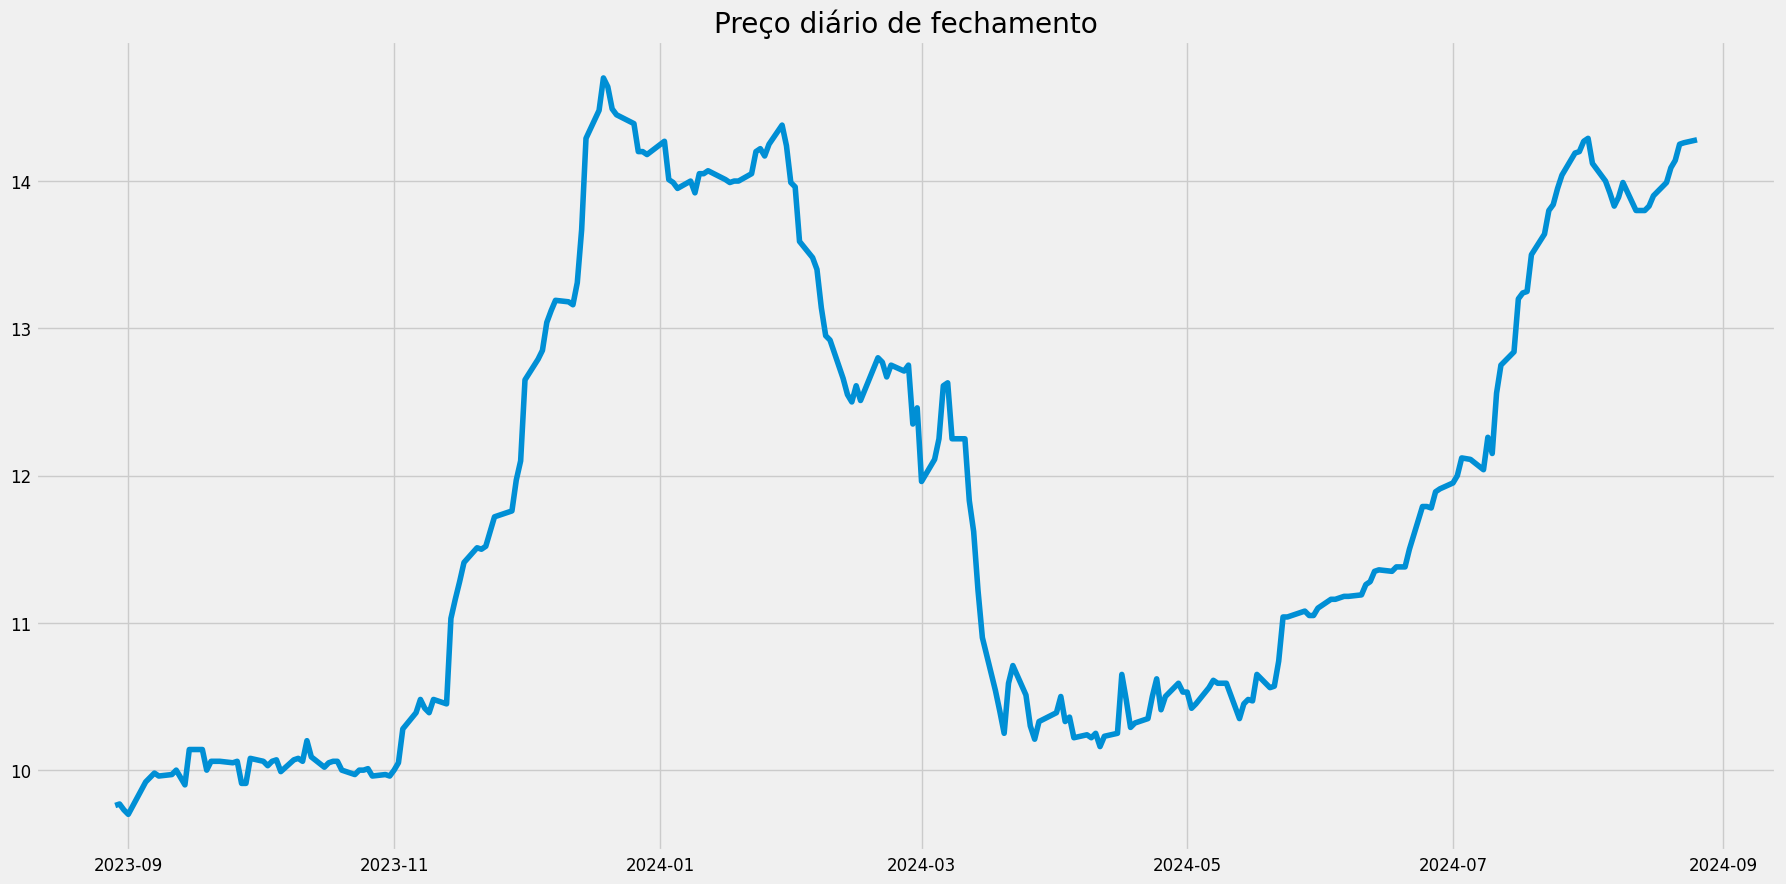

In [30]:
#EDA
plt.plot(df1['Fechamento'])
plt.title('Preço diário de fechamento')

Text(0.5, 1.0, 'Preço diário de fechamento')

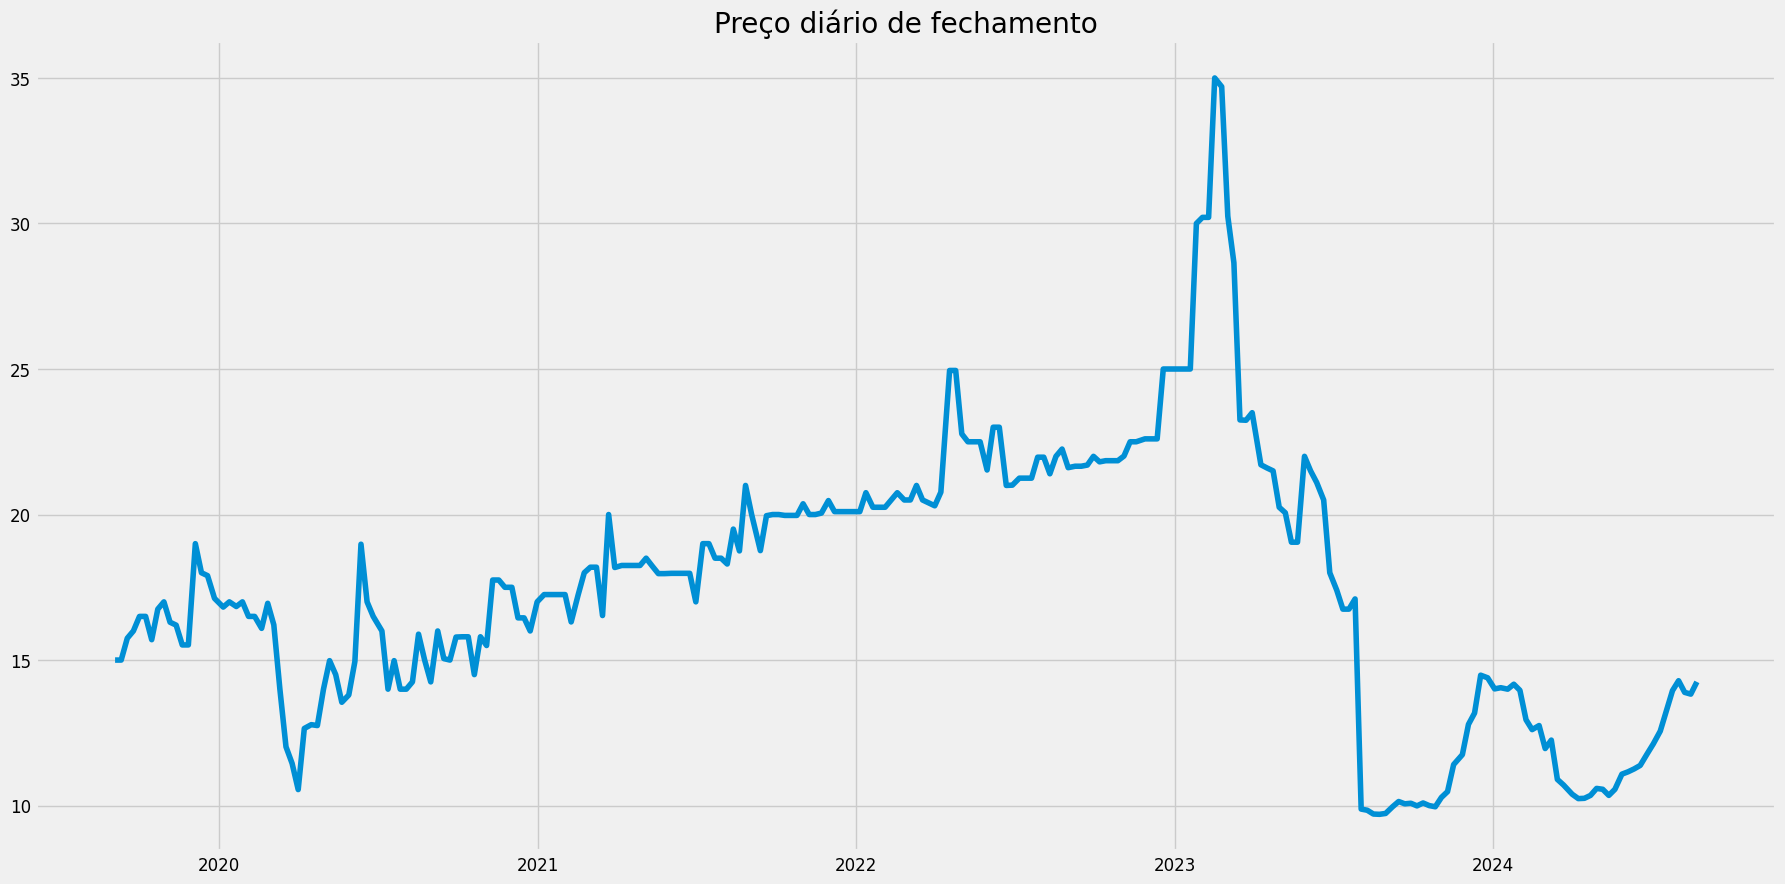

In [31]:
plt.plot(newdf5['Fechamento'])
plt.title('Preço diário de fechamento')

Text(0.5, 1.0, 'Histograma de retorno diário')

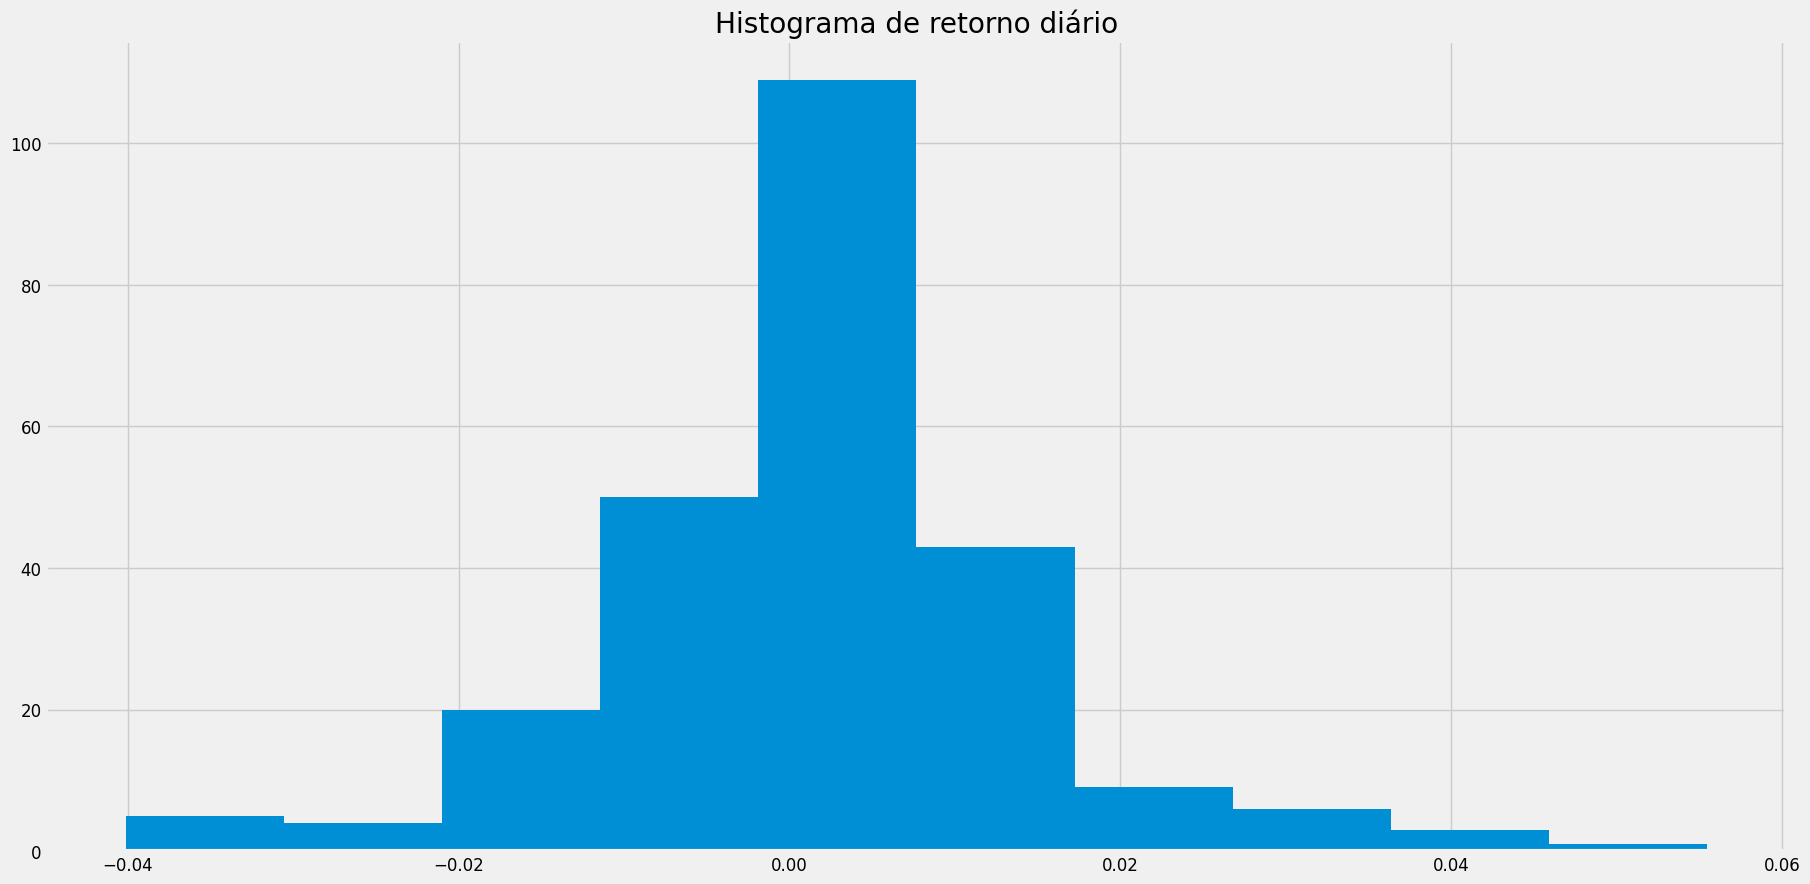

In [32]:
plt.hist(df1['Retorno_diario'])
plt.title('Histograma de retorno diário')

Text(0.5, 1.0, 'Retorno diário')

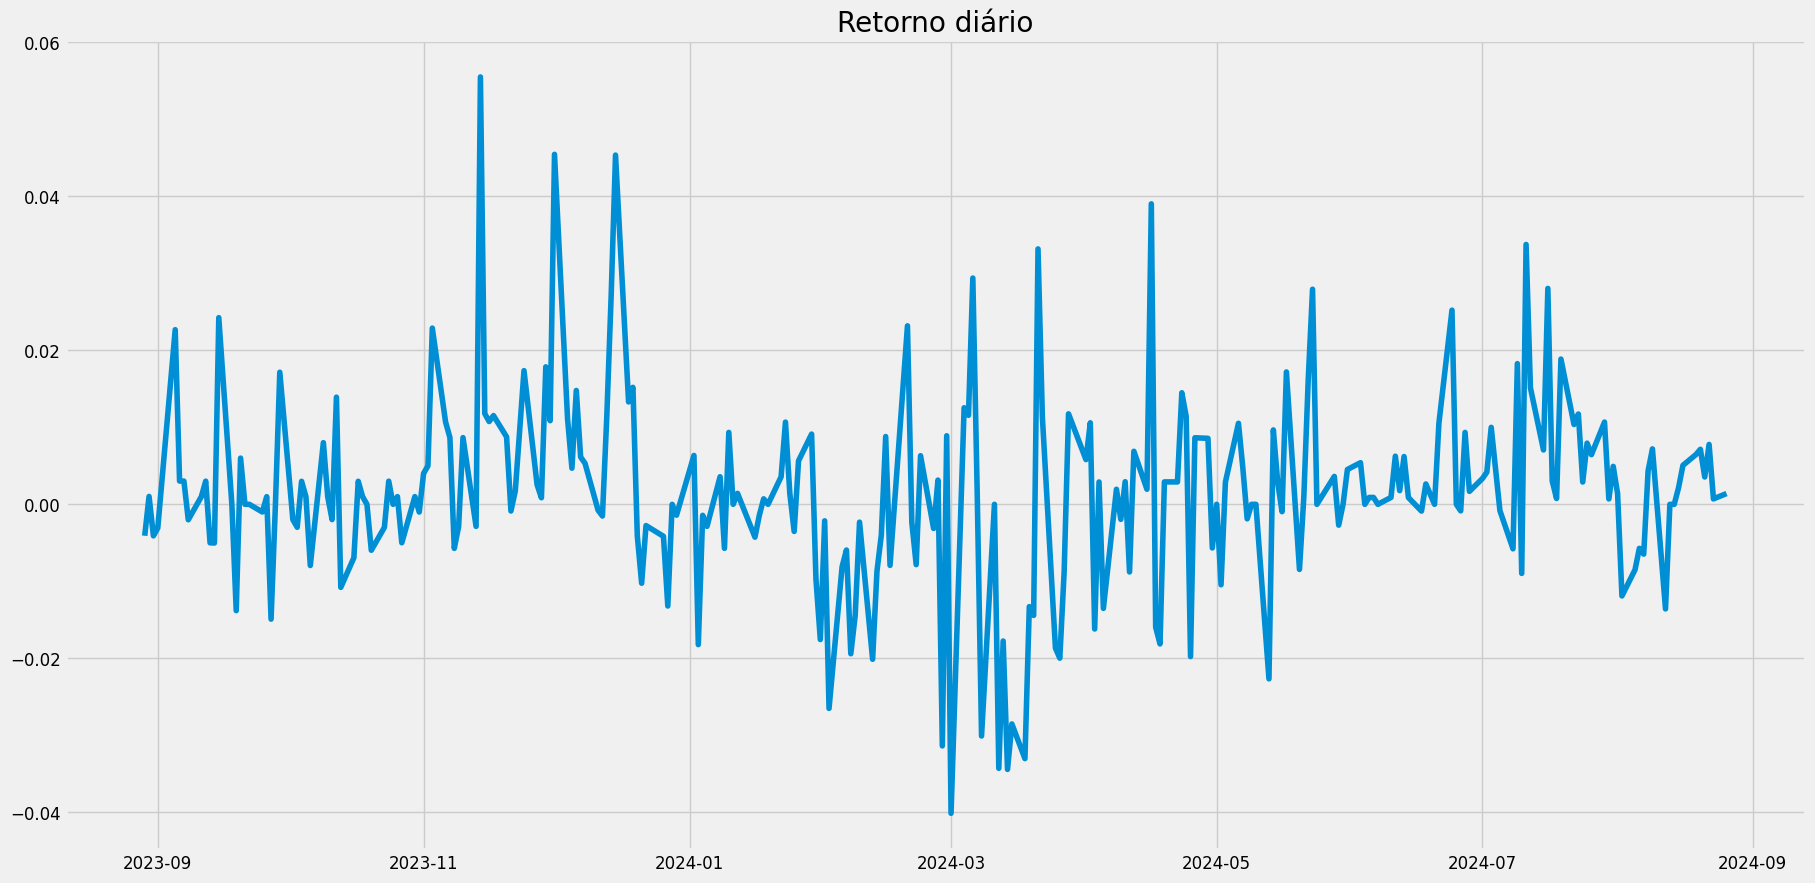

In [33]:
plt.plot(df1['Retorno_diario'])
plt.title('Retorno diário')

Apesar de algumas variações, a maioria dos registros fica entre -20% e +20%

Text(0.5, 1.0, 'Retorno semanal')

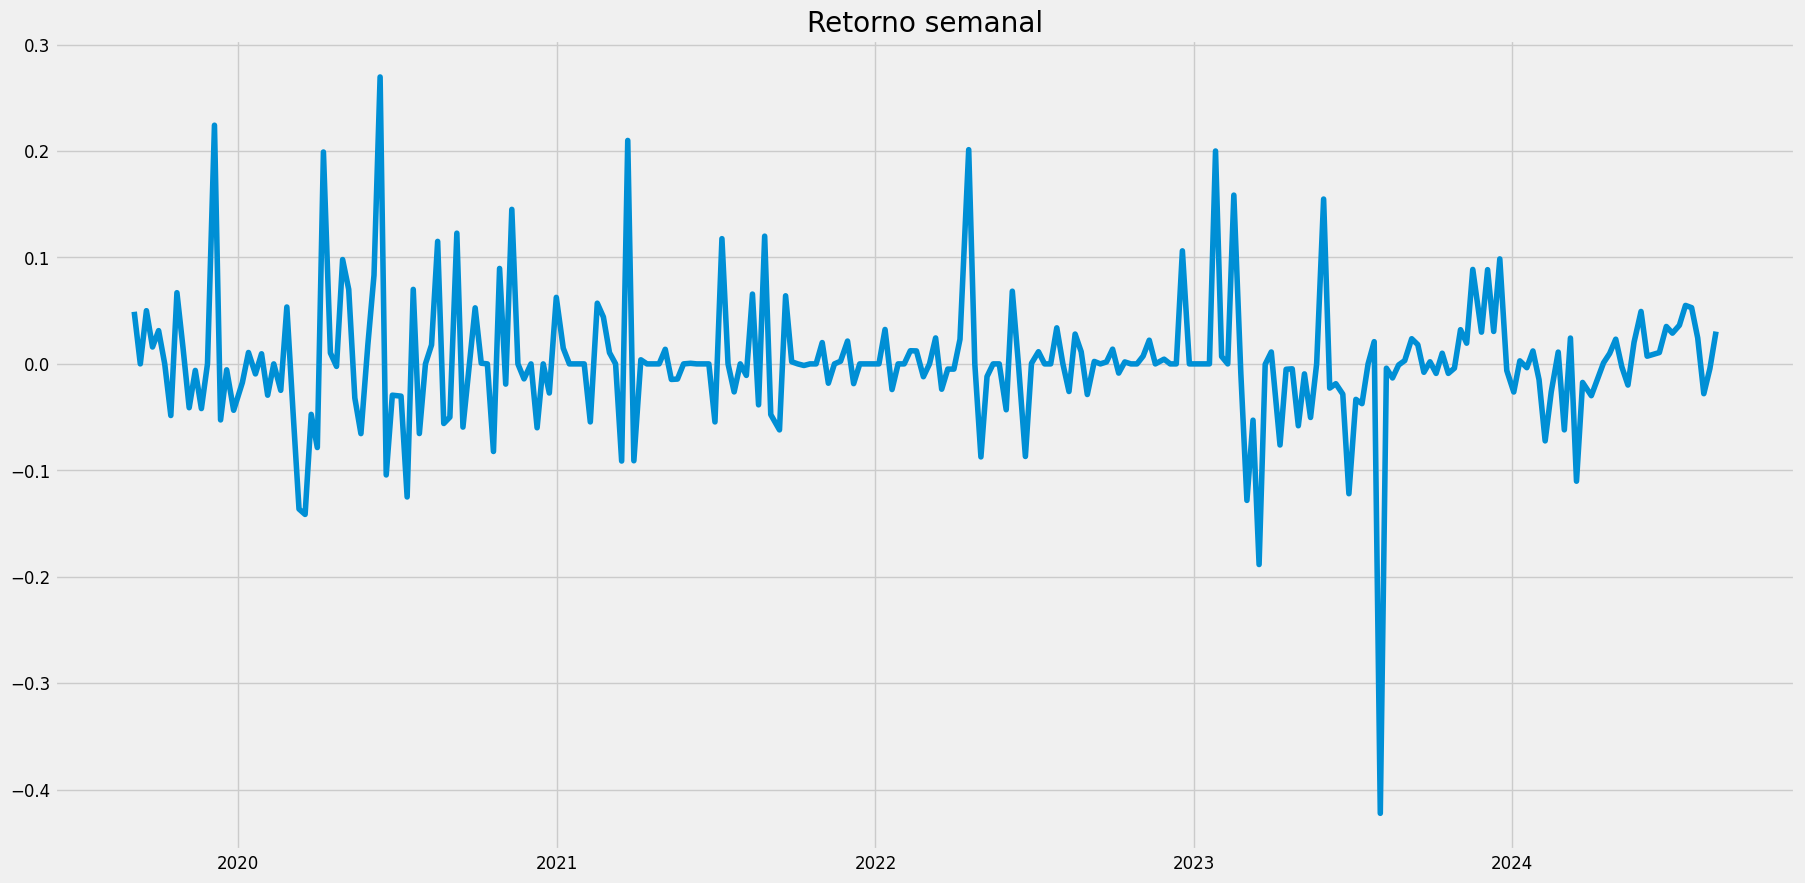

In [34]:
plt.plot(newdf5['Retorno_semanal'])
plt.title('Retorno semanal')

Apesar de algumas variações, a maioria dos registros fica entre -10% e +10%

In [35]:
#criando objeto que calcula o valor diario/semanal dos dfs para usar nas projeções
retorno_diario_acumulado = (1 + retorno_diario1).cumprod() - 1
retorno_semanal_acumulado = (1 + retorno_diario5).cumprod() - 1
print(retorno_diario_acumulado.max(),
retorno_semanal_acumulado.max())

0.4999999513431481 1.4475524149067422


In [36]:
#aqui começa o tratamento separado dos dfs, começando pelo df1
media_rd = np.mean(retorno_diario1)
desv_rd = np.std(retorno_diario1)

print(media_rd, desv_rd)





0.001587745475461118 0.012727888959735784


0.0015283835917105745 0.01270922239997999


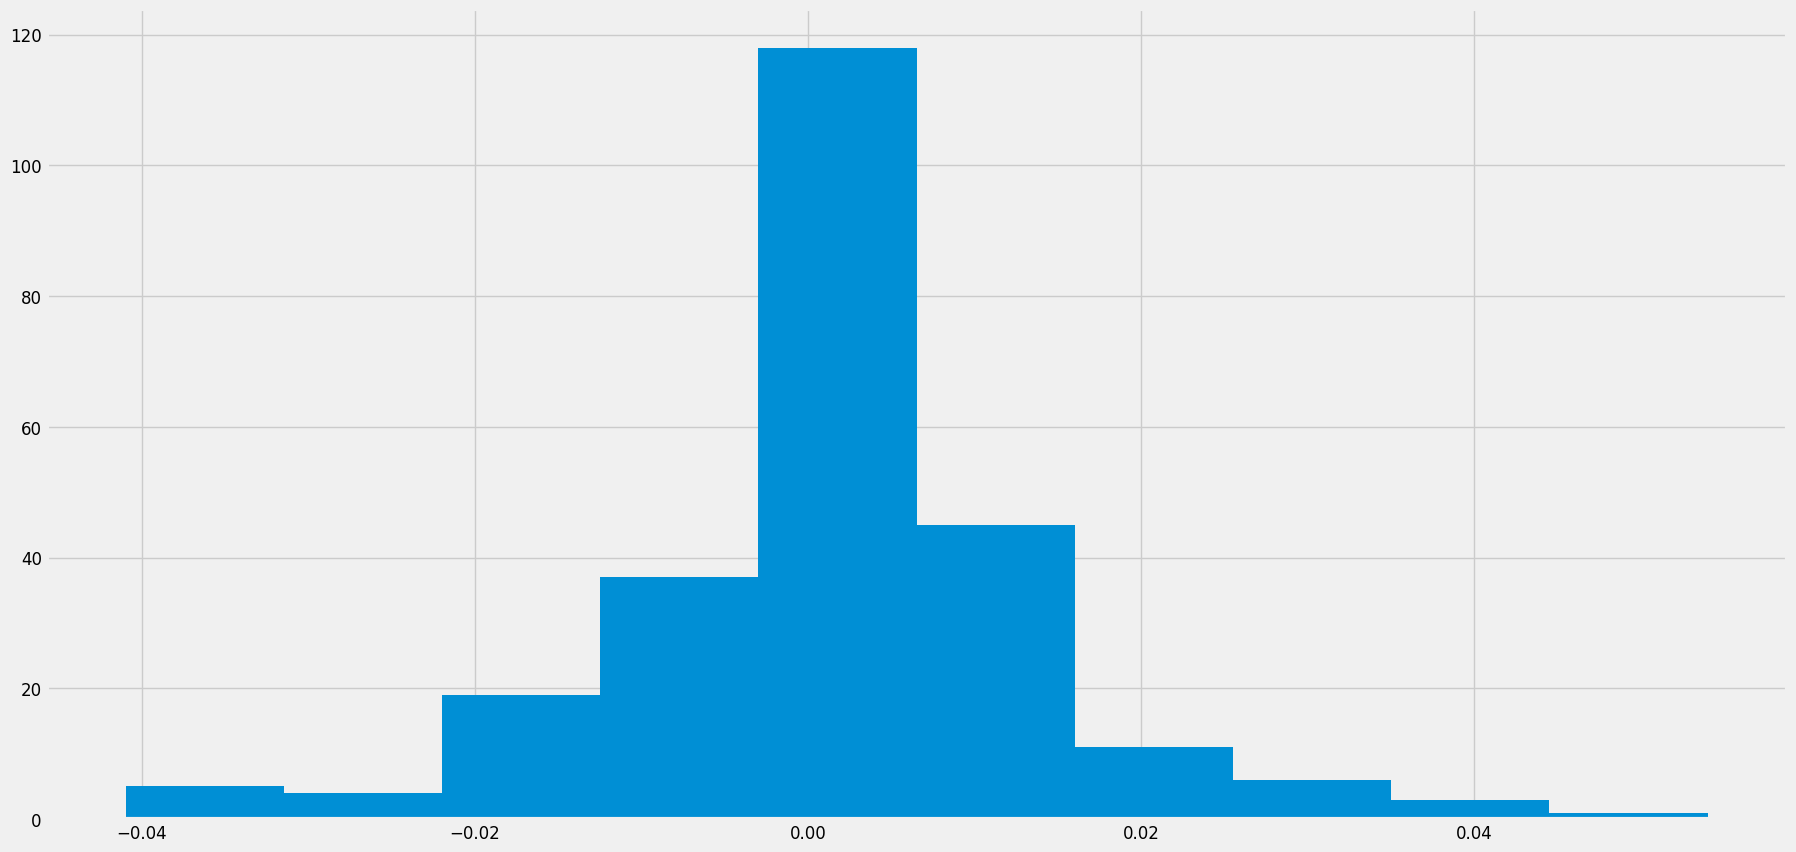

In [37]:
#Transformação logarítmica para equilíbrio dos dados
log_rd = (np.log(df1['Fechamento']) - np.log(df1['Fechamento'].shift(1))).dropna()
plt.hist(log_rd)

log_media_rd = np.mean(log_rd)
log_desv_rd = np.std(log_rd)
print(log_media_rd, log_desv_rd)

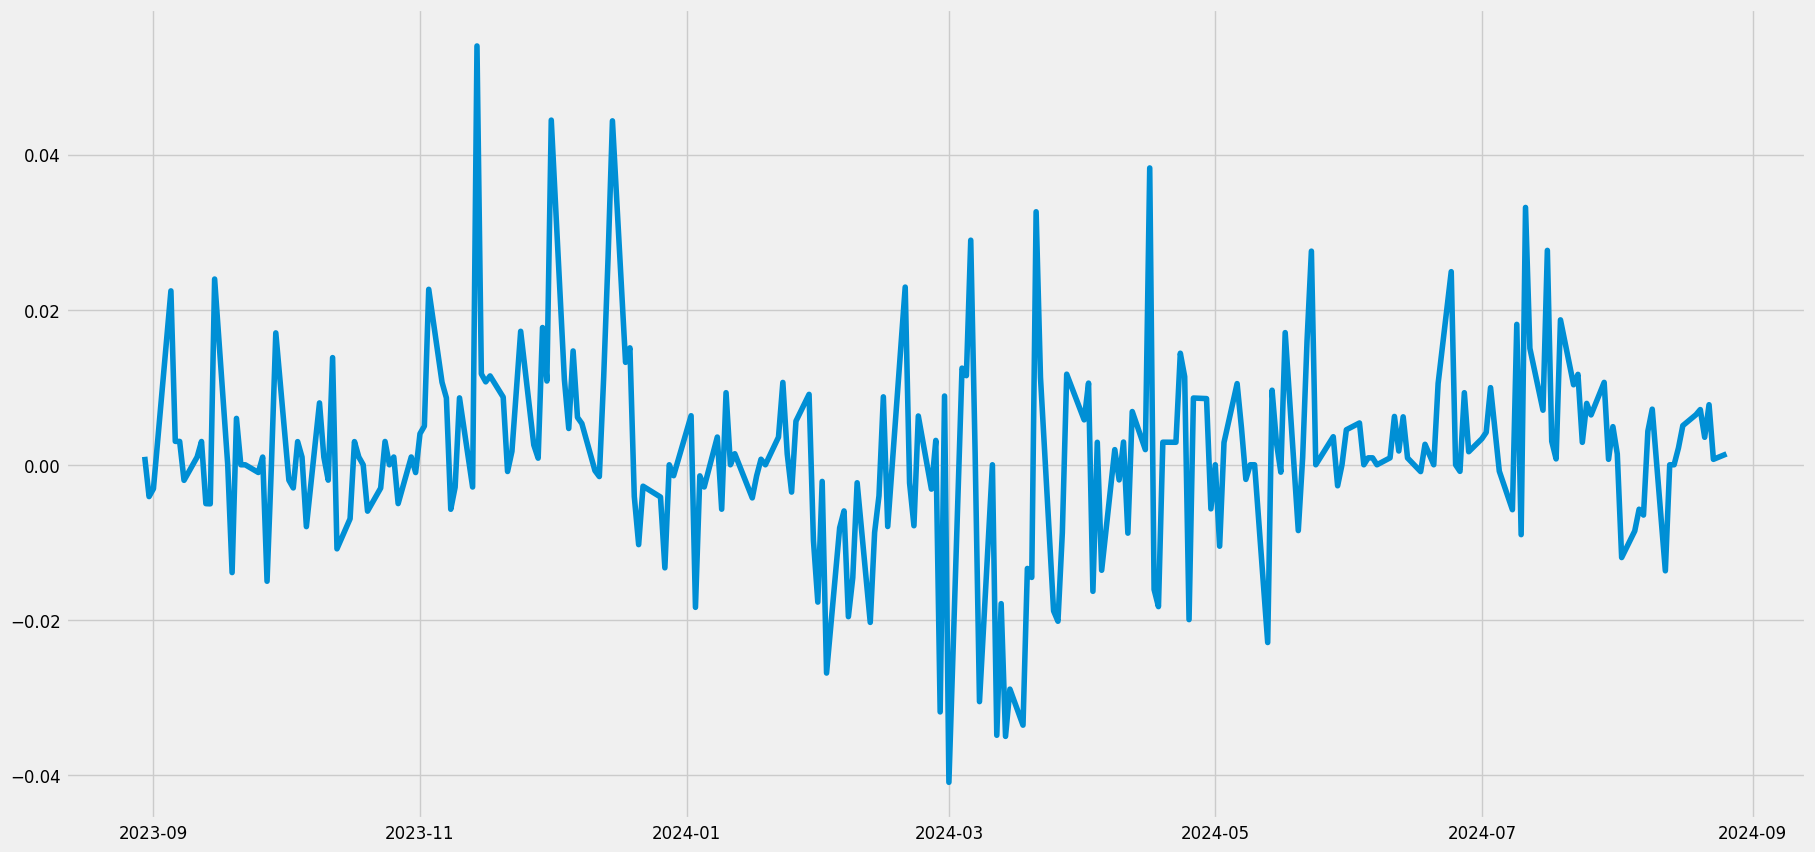

In [38]:
plt.plot(log_rd)

In [39]:
#Nível de variância. Conforme dados históricos de variação de 20% para mais ou para menos
var_level = 80
var = np.percentile(log_rd, 100 - var_level)
print(var)

-0.005730669228098062


In [40]:
#Simulação de Monte Carlo
#Dias a serem previstos (1 ano)
pred_days = 365
#número de simulações
simulations = 3000
#último preço
last_price = 14.26

#loop para simulações
results = np.empty((simulations, pred_days))

for s in range (simulations):
  random_results = 1 + np.random.normal(loc = log_rd.mean(),
                                        scale = log_desv_rd,
                                        size = pred_days)
  result = last_price * random_results.cumprod()
  results[s, :] = result


In [41]:
df1.index.max()

Timestamp('2024-08-26 00:00:00-0400', tz='America/New_York')

In [42]:
#defininindo o índice da série simulada. Começando a partir de 'amanhã'
index = pd.date_range('2024-08-26 00:00:00-0400', periods = pred_days, freq = 'D')
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

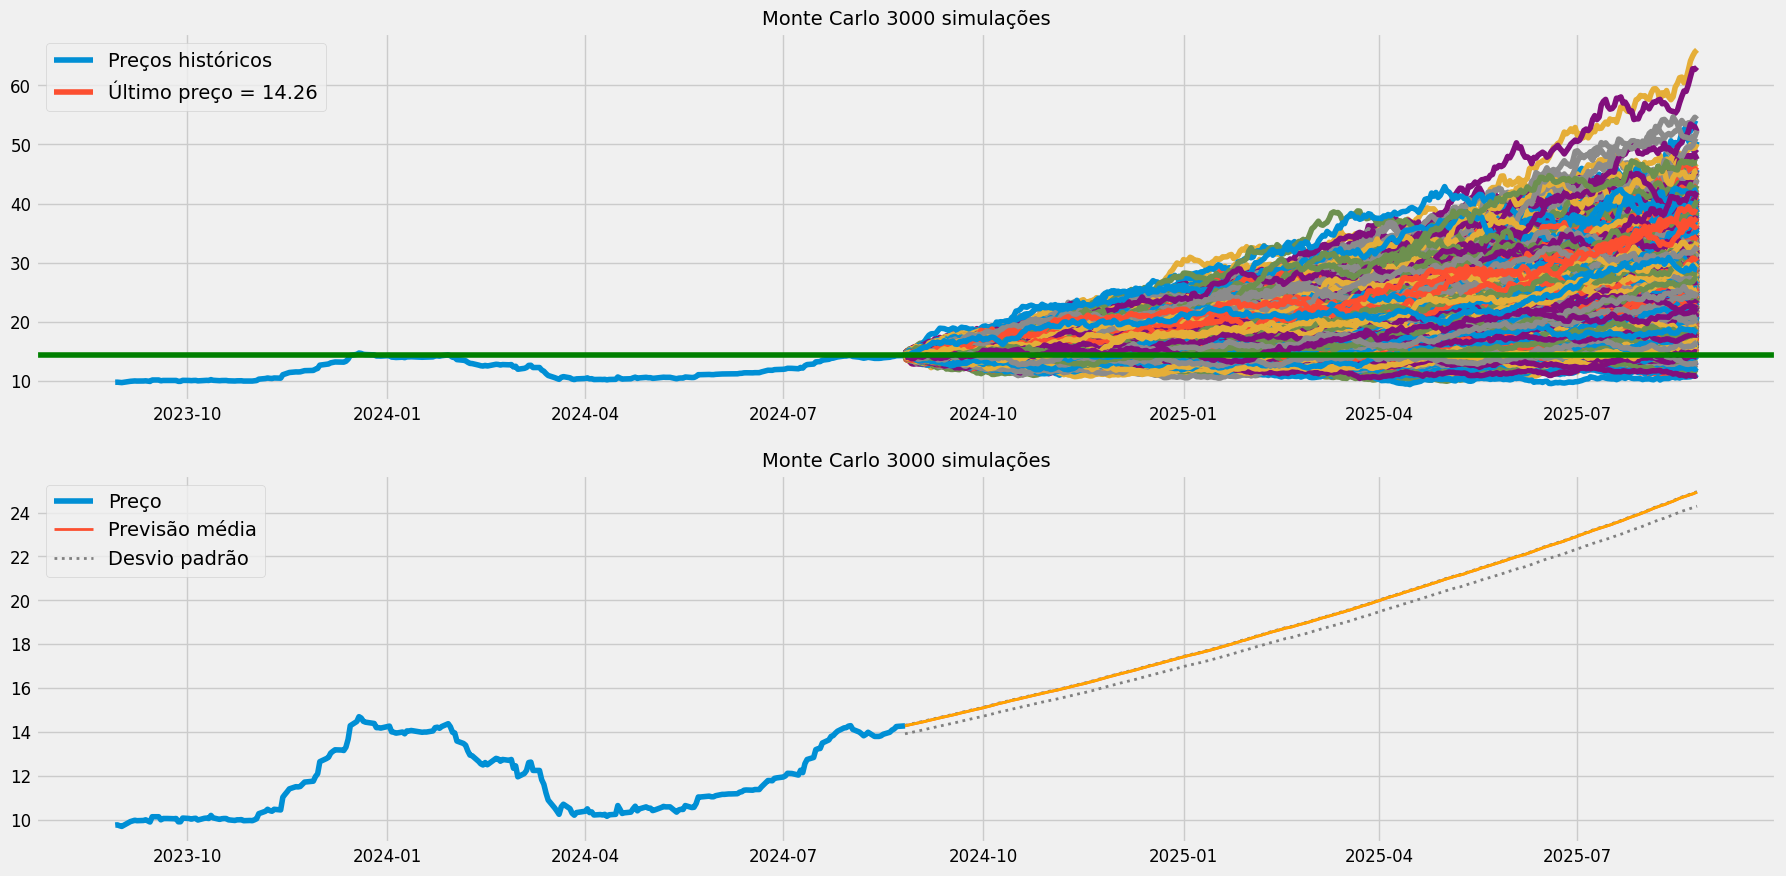

In [43]:
#Plotando os resultados de projeção em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

ax[0].plot(df1['Fechamento'][:"2025-02-25 00:00:00-0400"])

ax[0].plot(resultados)

ax[0].axhline(14.30, c = "green")

ax[0].set_title(f"Monte Carlo {simulations} simulações", size = 14)

ax[0].legend(["Preços históricos", "Último preço = 14.26"])

ax[1].plot(df1['Fechamento'][:"2025-02-25 00:00:00-0400"])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * 1+2 * log_desv_rd)),
                                   lw =2, linestyle="dotted", c = 'gray')

ax[1].plot(media_resultados, lw = 2, c = "orange")
ax[1].plot(media_resultados.apply((lambda x : x *(1-2*log_desv_rd))),
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Monte Carlo {simulations} simulações", size = 14)

ax[1].legend(["Preço", "Previsão média","Desvio padrão"])


plt.show()

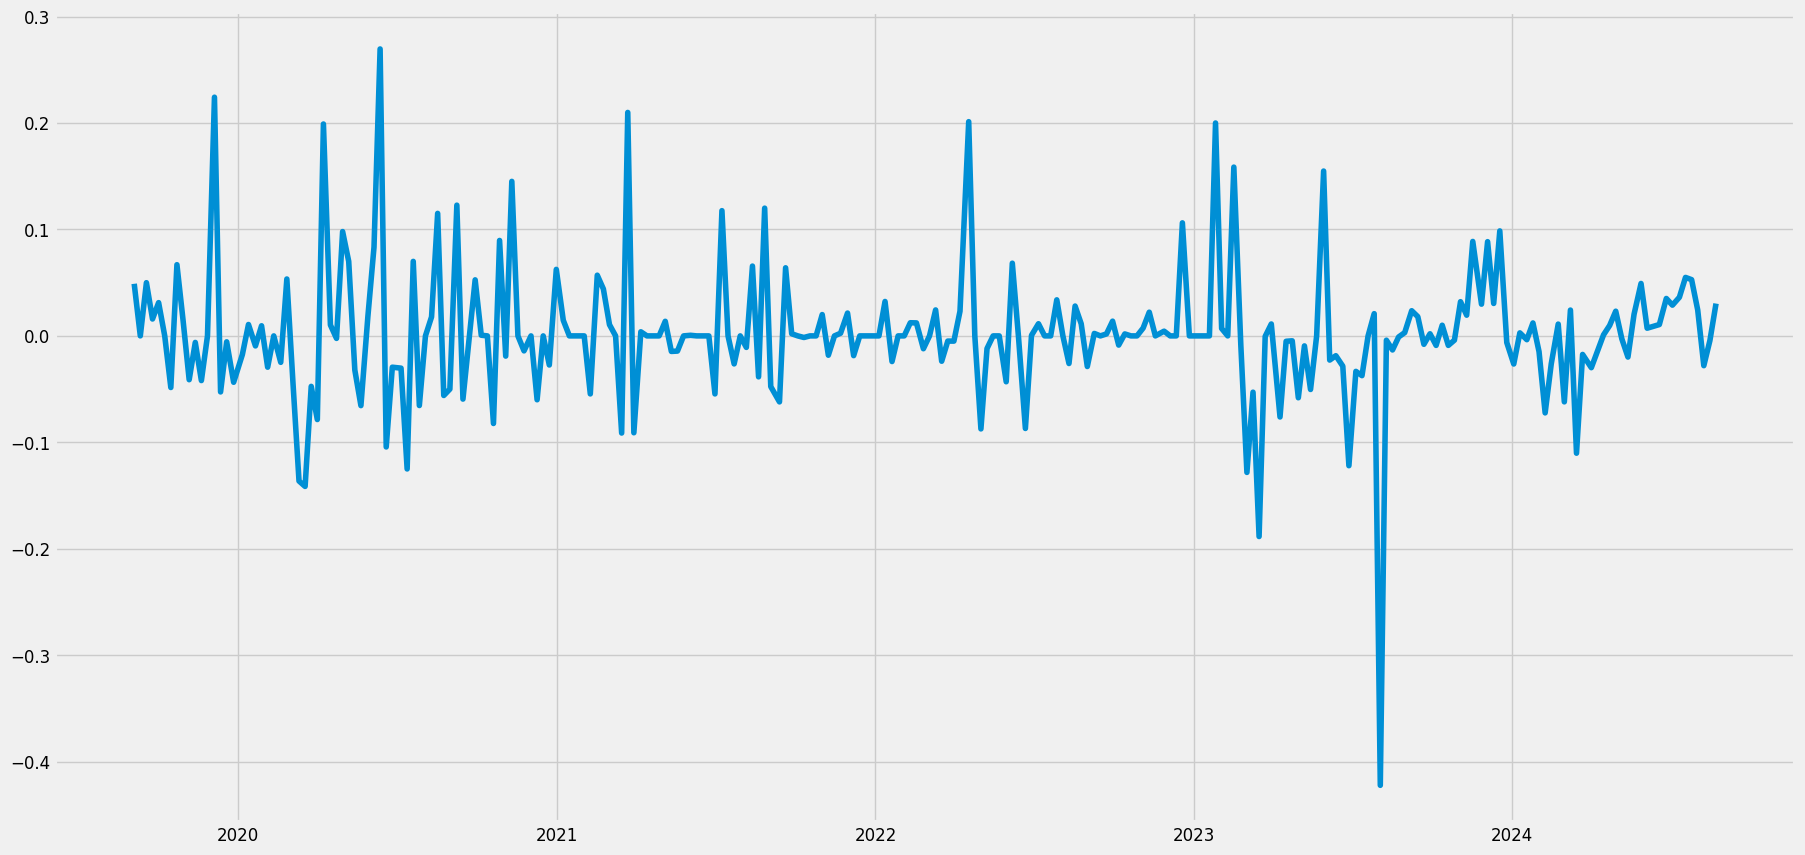

In [44]:
 #repetição do processo agora com newdf5
 plt.plot(retorno_diario5)

(array([  1.,   0.,   0.,   1.,  13.,  67., 142.,  18.,   5.,   4.]),
 array([-0.42222223, -0.35304349, -0.28386474, -0.214686  , -0.14550726,
        -0.07632851, -0.00714977,  0.06202897,  0.13120772,  0.20038646,
         0.2695652 ]),
 <BarContainer object of 10 artists>)

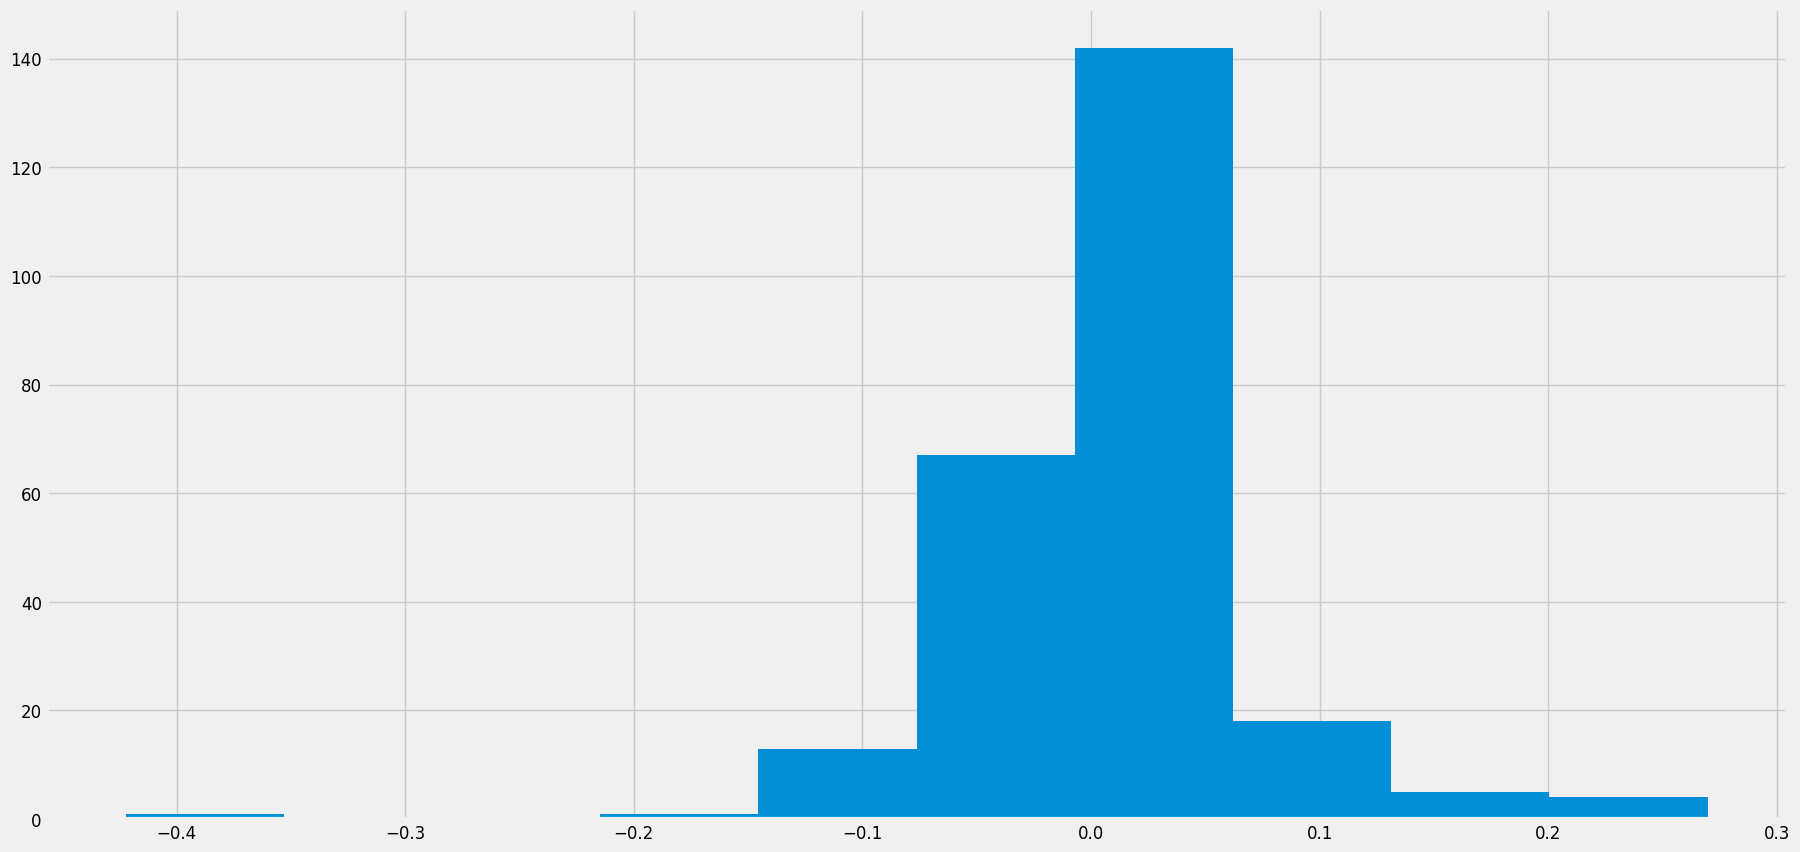

In [45]:
plt.hist(retorno_diario5)

0.002090303366695524 0.06351708019152949 -0.00020517317755020236 0.06601149140480807


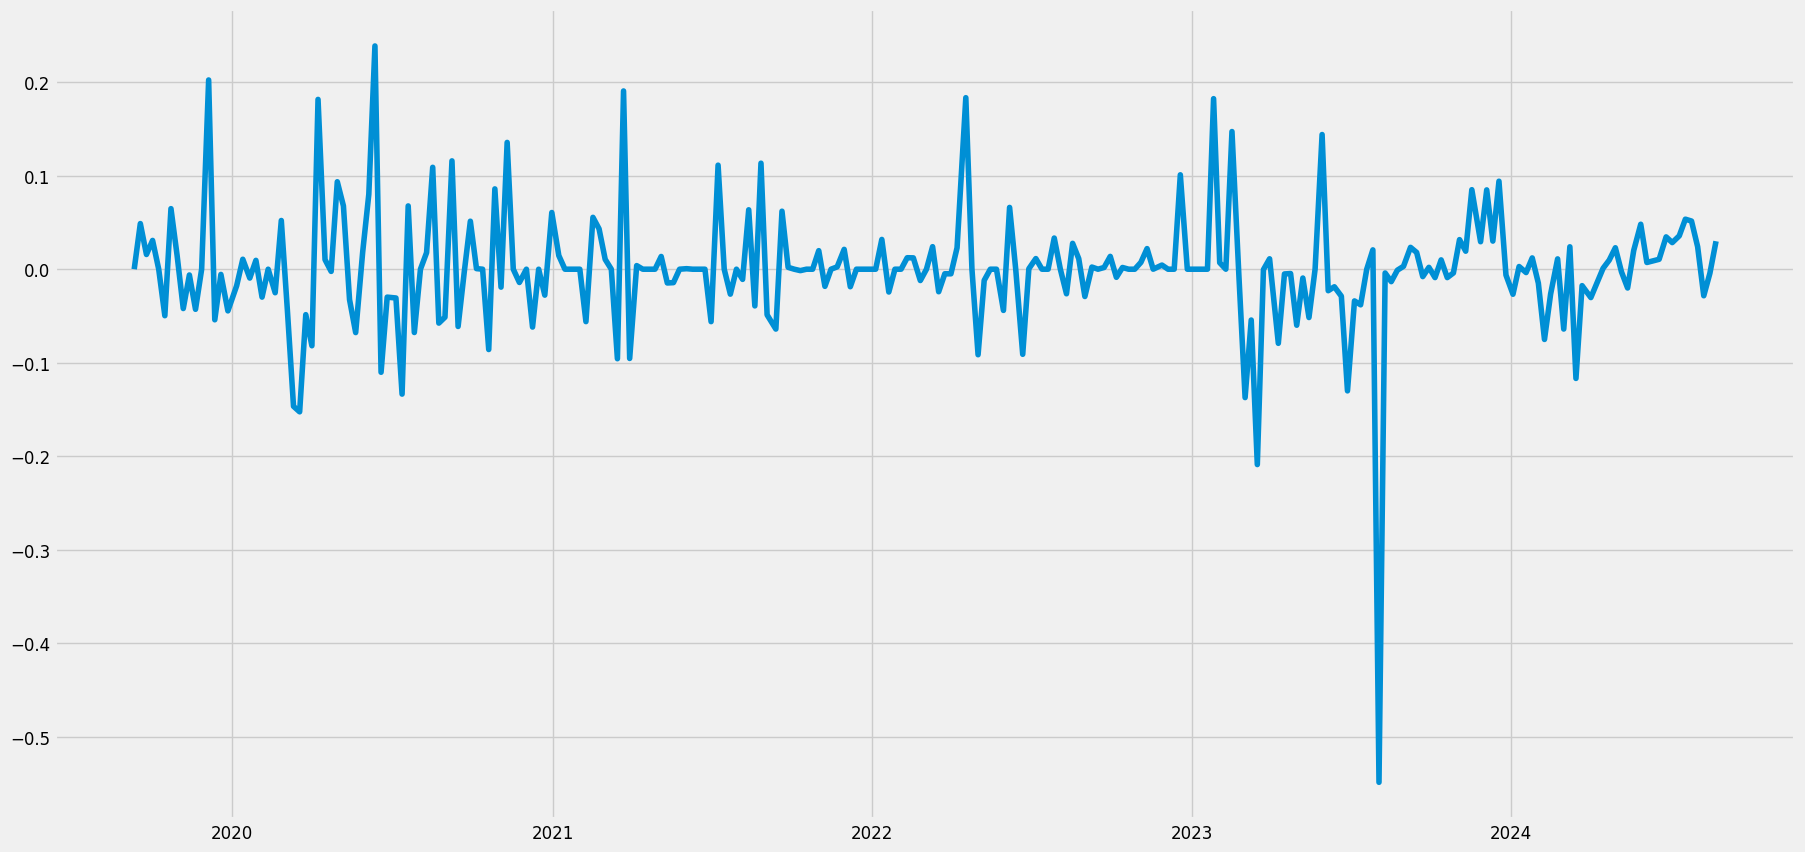

In [48]:
#media_rd = np.mean(retorno_diario1)
#desv_rd = np.std(retorno_diario1)
''''log_rd = (np.log(df1['Fechamento']) - np.log(df1['Fechamento'].shift(1))).dropna()
plt.hist(log_rd)

log_media_rd = np.mean(log_rd)
log_desv_rd = np.std(log_rd)
print(log_media_rd, log_desv_rd)'''

media_rs = np.mean(retorno_diario5)
desv_rs = np.std(retorno_diario5)

log_rs = (np.log(newdf5['Fechamento']) - np.log(newdf5['Fechamento'].shift(1))).dropna()
plt.plot(log_rs)


log_media_rs = np.mean(log_rs)
log_desv_rs = np.std(log_rs)
print(media_rs, desv_rs, log_media_rs, log_desv_rs)

(array([  1.,   0.,   0.,   1.,  13.,  67., 142.,  18.,   5.,   4.]),
 array([-0.42222223, -0.35304349, -0.28386474, -0.214686  , -0.14550726,
        -0.07632851, -0.00714977,  0.06202897,  0.13120772,  0.20038646,
         0.2695652 ]),
 <BarContainer object of 10 artists>)

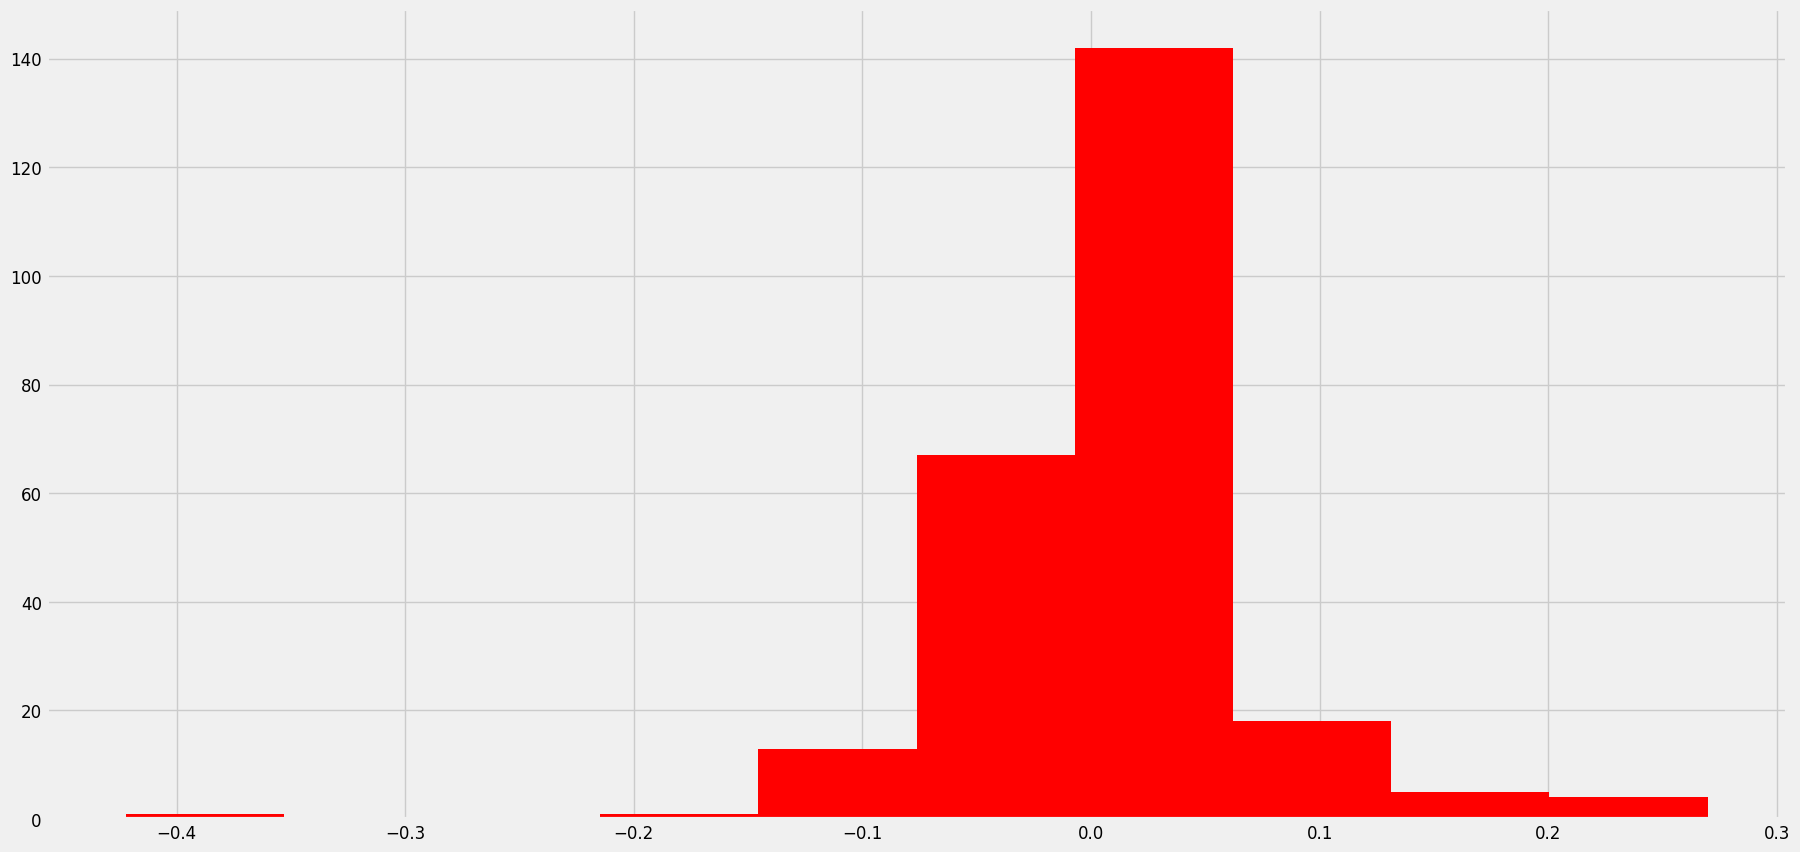

In [49]:
plt.hist(retorno_diario5, color = 'red')


In [50]:
var_level2 = 90
var2 = np.percentile(log_rs, 100 - var_level2)
print(var2)

-0.05620597368015159


In [51]:
pred_days2 = 730
simulations2 = 3000
last_price2 = 14.26

results2 = np.empty((simulations2, pred_days2))

for s in range (simulations2):
  random_results2 = 1 + np.random.normal(loc = log_rs.mean(),
                                        scale = log_desv_rs,
                                        size = pred_days2)
  result2 = last_price2 * random_results2.cumprod()
  results2[s, :] = result2


In [52]:
index2 = pd.date_range('2024-08-26 00:00:00-0400', periods = pred_days2, freq = 'D')
resultados2 = pd.DataFrame(results2.T, index = index2)
media_resultados2 = resultados2.apply("mean", axis = 1)

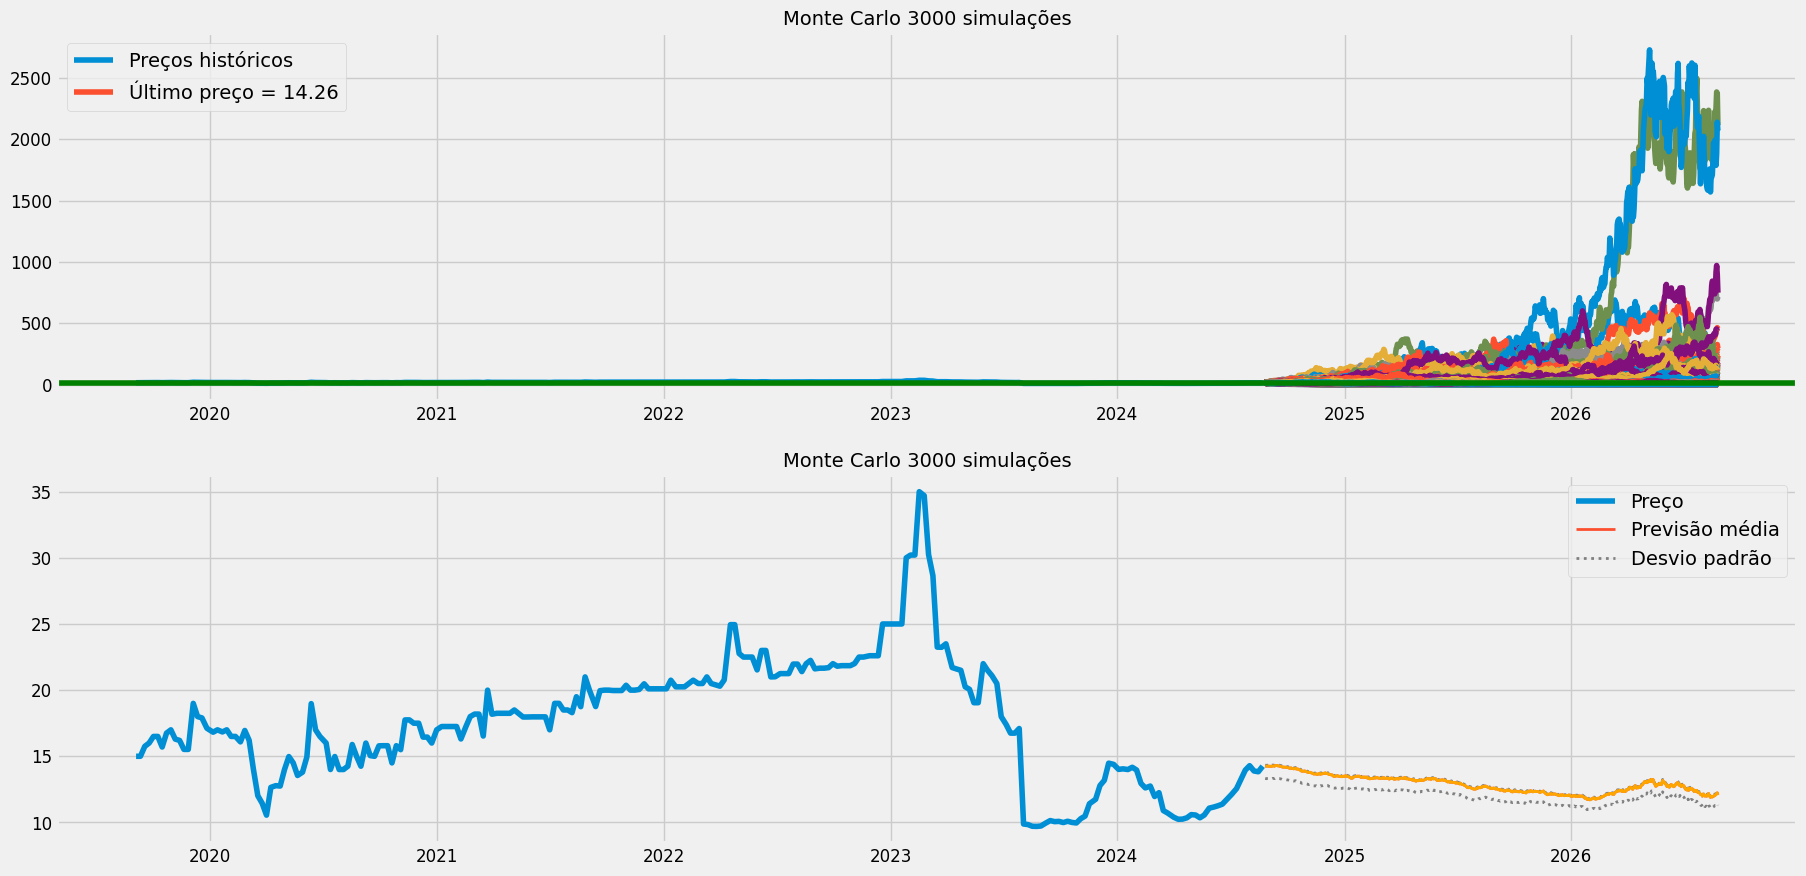

In [53]:
#Plotando as simulações e a projeção
fig, ax = plt.subplots(nrows = 2, ncols = 1)

ax[0].plot(newdf5['Fechamento'][:"2026-02-26 00:00:00-0400"])

ax[0].plot(resultados2)

ax[0].axhline(14.30, c = "green")

ax[0].set_title(f"Monte Carlo {simulations2} simulações", size = 14)

ax[0].legend(["Preços históricos", "Último preço = 14.26"])

ax[1].plot(newdf5['Fechamento'][:"2026-02-26 00:00:00-0400"])

ax[1].plot(resultados2.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados2.apply((lambda x: x * 1+1 * log_desv_rs)),
                                   lw =2, linestyle="dotted", c = 'gray')

ax[1].plot(media_resultados2, lw = 2, c = "orange")
ax[1].plot(media_resultados2.apply((lambda x : x *(1-1*log_desv_rs))),
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Monte Carlo {simulations2} simulações", size = 14)

ax[1].legend(["Preço", "Previsão média","Desvio padrão"])


plt.show()

- Após análises, nota-se que quando se leva em conta apenas o último ano, as projeções são mais otimistas e preveem uma valorização no valor das ações.
- Já levando em conta os últimos 5 anos, a projeção é de baixa queda. Provavelmente pois as variáveis são alteradas devido ao período de 2023 onde houve uma desvalorização abrupta.